**Problem Definition**

* It is a sports case study where data for 2014 to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. It will help the team management to replace the team member.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler, power_transform
from scipy import stats
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Baseball/baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
df.shape

(30, 17)

In [4]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

* checking for null value

<AxesSubplot:>

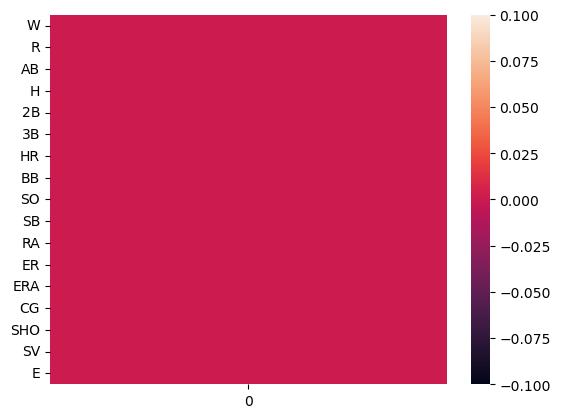

In [5]:
sns.heatmap(df.isnull().sum().to_frame())

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


* No need to change the datatype they are appropriate

#### Descriptive statistics

In [7]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


* It's quite looks good and do not need to do Normalization so we can skip the step of data conversion Now directly jumps to Visualization

#### Visualization

* Now, let’s visualize the distribution of continuous features

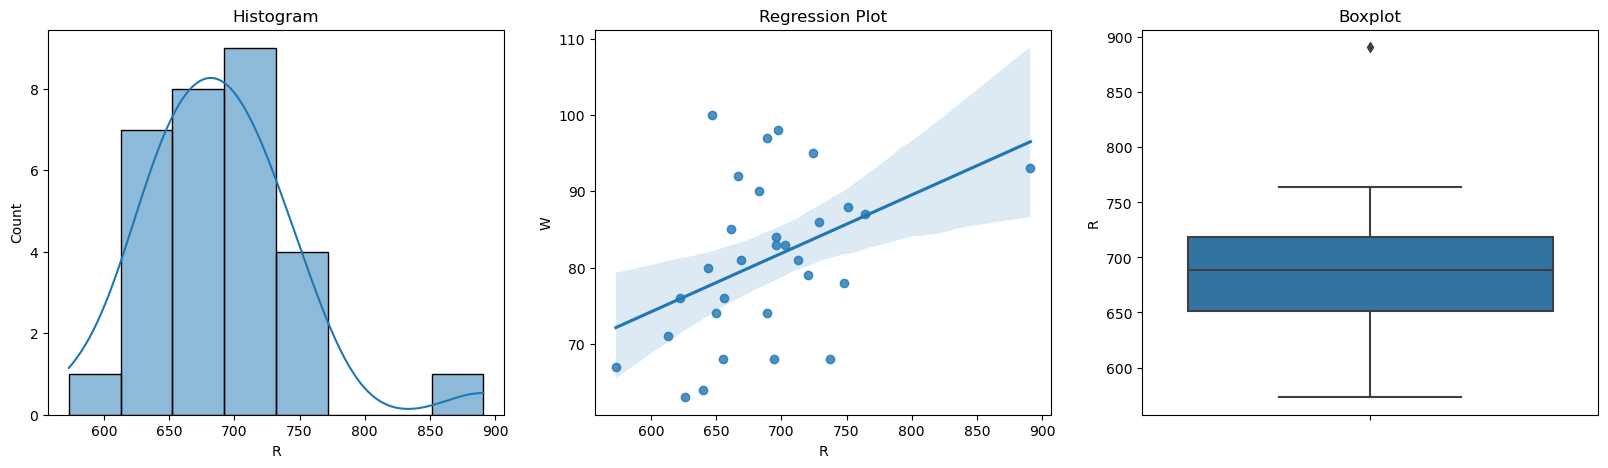

In [8]:
def pplot(df, i):
    plt.figure(figsize=(20, 5))
    
    plt.subplot(1, 3, 1)
    sns.histplot(x=i, data=df, kde=True)
    plt.title('Histogram')
    
    plt.subplot(1, 3, 2)
    if 'W' in df.columns:
        sns.regplot(x=i, y='W', data=df)
        plt.title('Regression Plot')
    
    plt.subplot(1, 3, 3)
    sns.boxplot(y=i, data=df)
    plt.title('Boxplot')
    
    plt.show()

# Call the function For 'R' -This indicates Runs scored
pplot(df, 'R')


* Run and win are linearly correlated. And outliers are present between 850 and 900

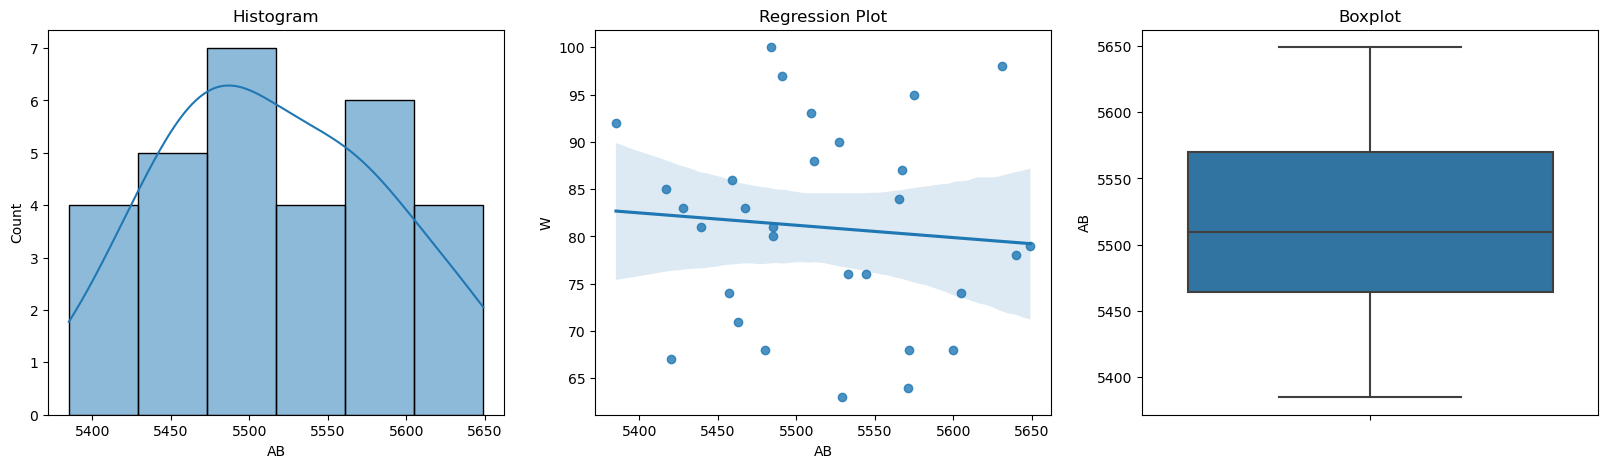

In [9]:
# Call the function For 'AB' - This means At bat or time at bat
pplot(df, 'AB')

* At balls is very weekly related to Wins With no outliers.

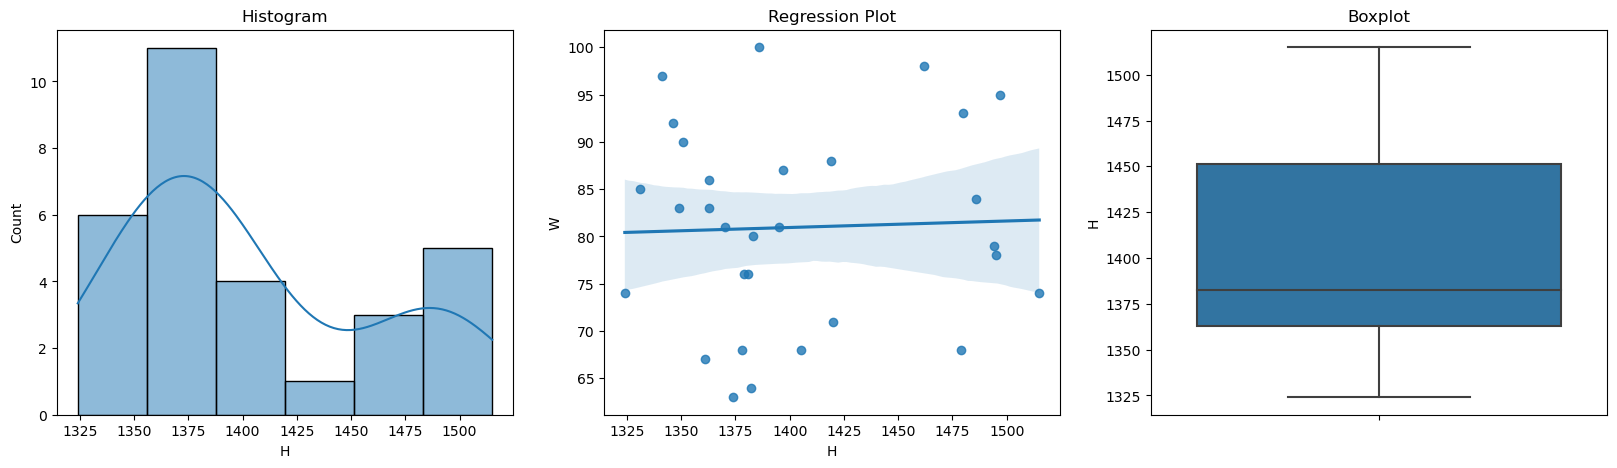

In [10]:
#call the function for 'H' - This means Hit. It's also called a "base hit"
pplot(df,'H')

* Hits are also very weekly related to winning with no outliers

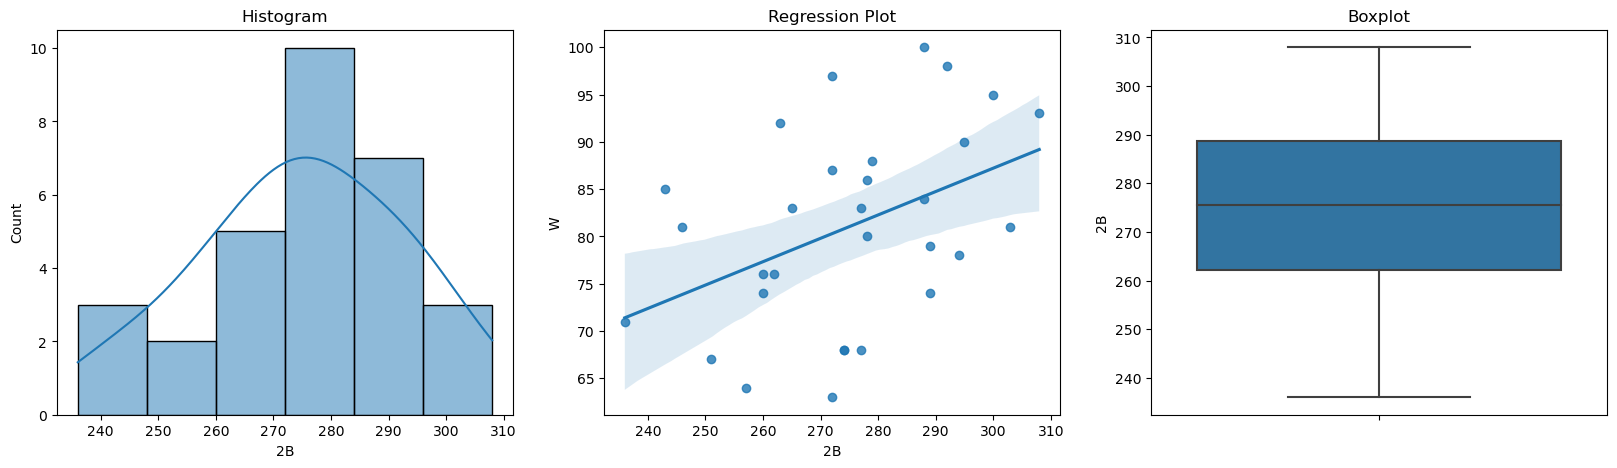

In [11]:
#call the function for '2B' - This means the act of a batter striking the pitched ball and safely reaching second base without being called out by the umpire, without the benefit of a fielder's misplay (see error) or another runner being put out on a fielder's choice
pplot(df, '2B')

* Doubles are linearly related with Wins, with no outlier, and data is left-skewed

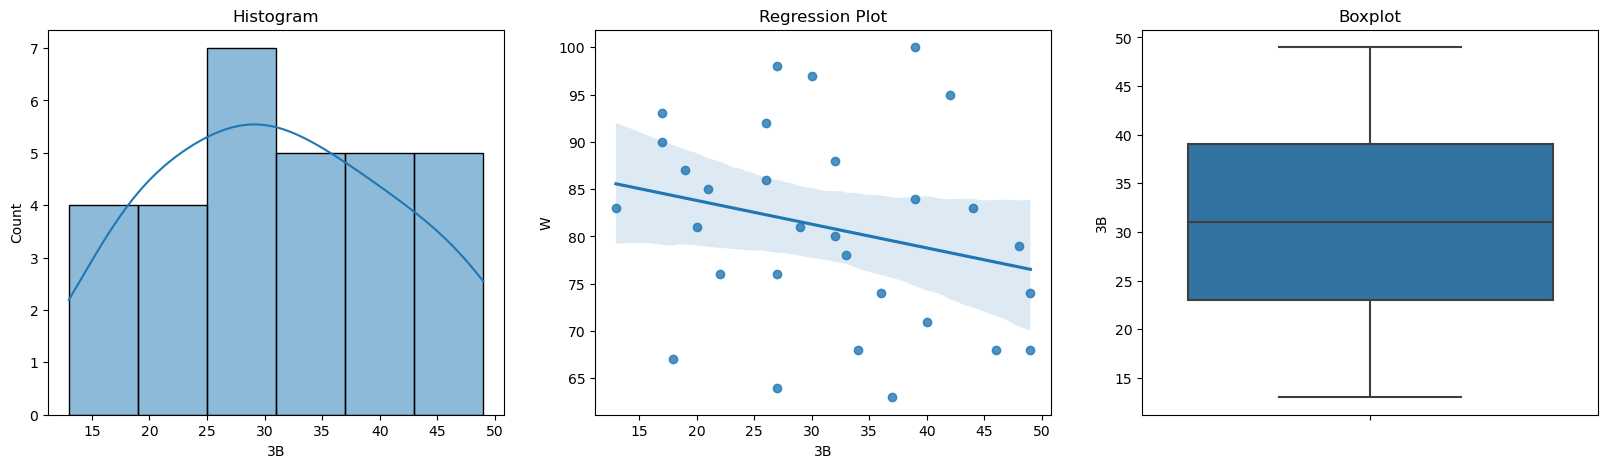

In [12]:
#call the function for '3B' - This measns a Triple.
pplot(df,'3B')

* Triple has very weak negative correlations with win with no outlier and data is right-skewed

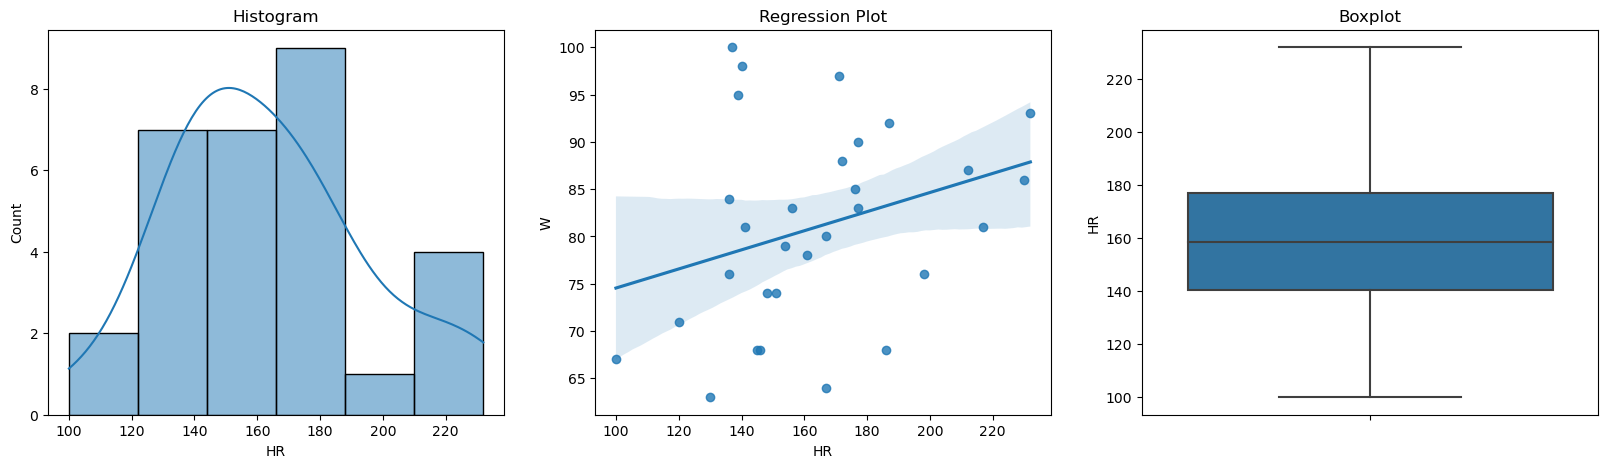

In [13]:
#call the function for 'HR' - This means Home runs. 
pplot(df,'HR')

* The home run has a very low correlation with wins with no lot of outliers and data is right-skewed

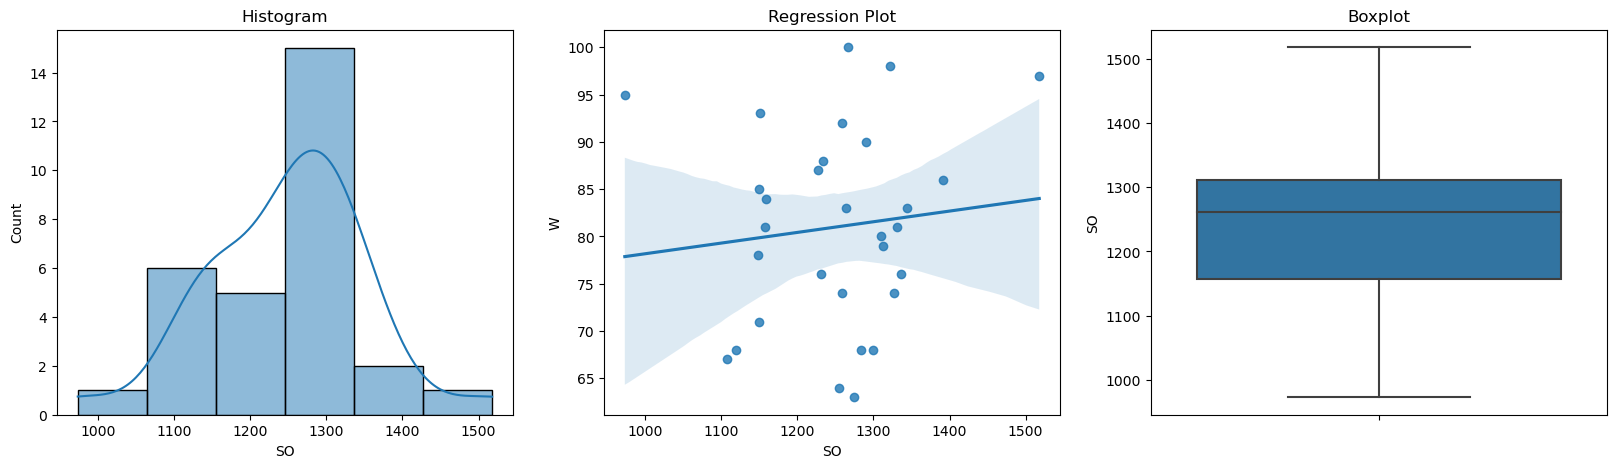

In [14]:
#call the function for 'SO' - this means strikout Also denoted as "K" .
pplot(df,'SO')

* Strikeout is not correlated to win with no outlier and the dataset is left-skewed.

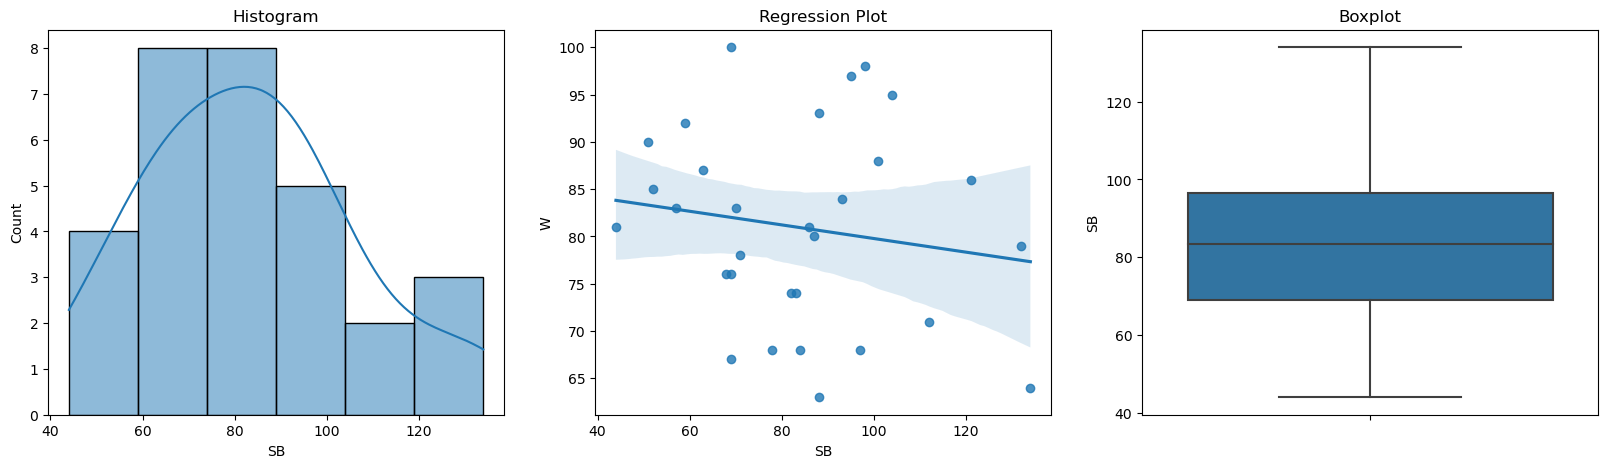

In [15]:
#call the function for 'SB' - This means Stolen base.
pplot(df,'SB')

* Stolen Bases is not correlated to win with no outlier

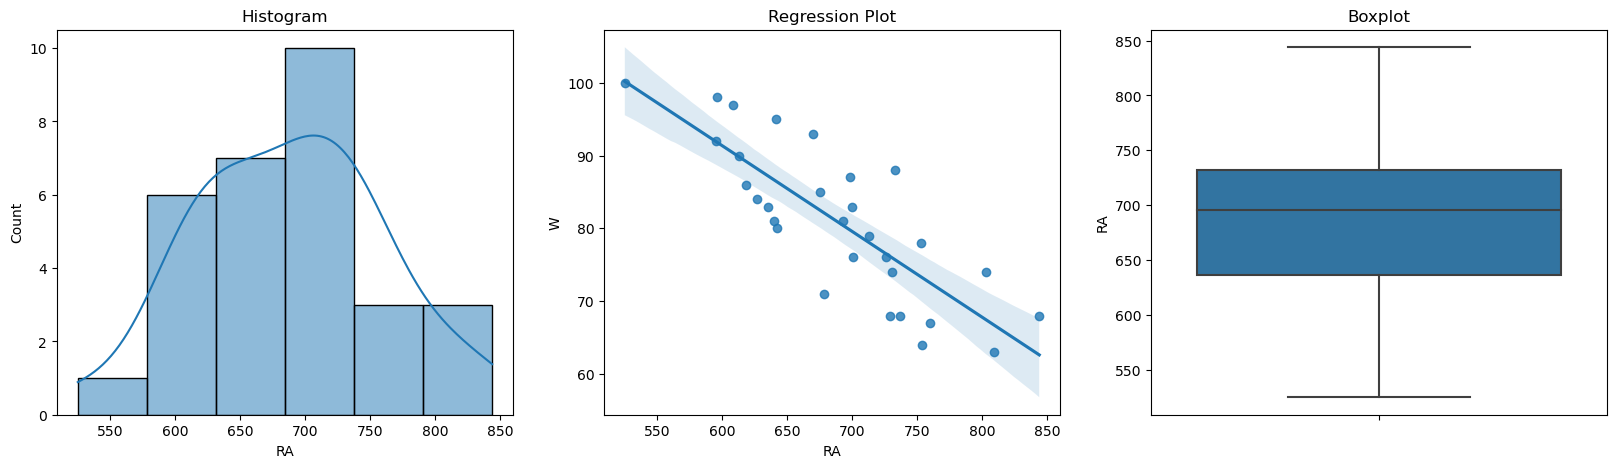

In [16]:
#call the function for 'RA' - This means Run Average
pplot(df,'RA')

* Run Average highly correlated to win with no outliers with no outlier and data is left-skewed

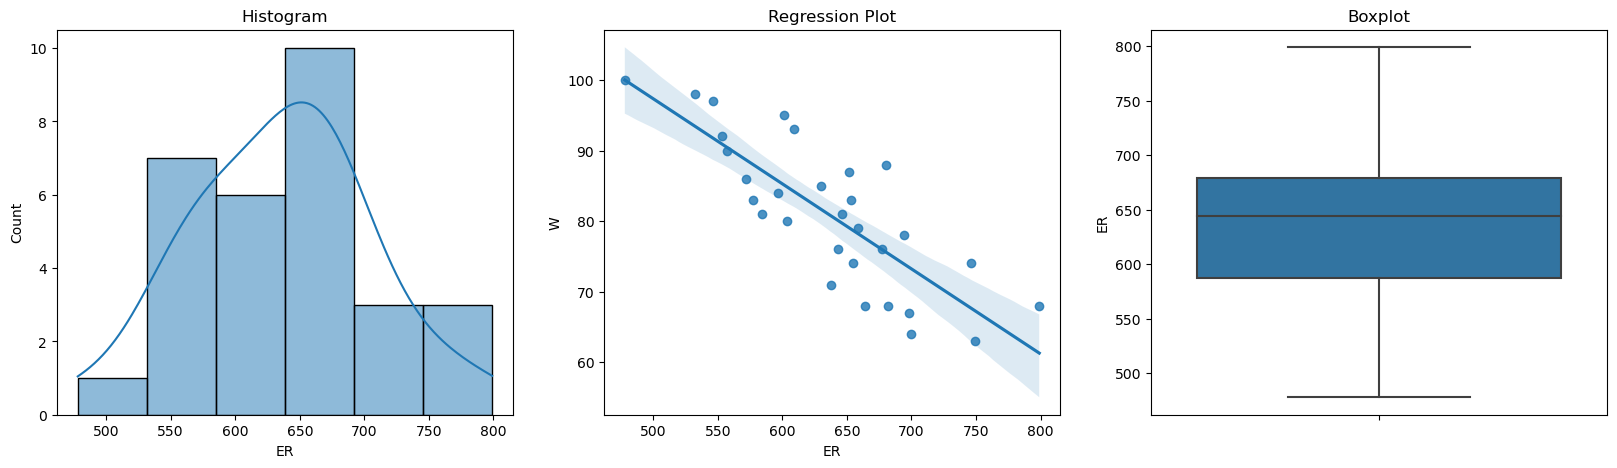

In [17]:
#call the function for 'ER' - This means Earned Run
pplot(df,'ER')

* Earned Runs is highly correlated to win with no outliers and data is left -skewed

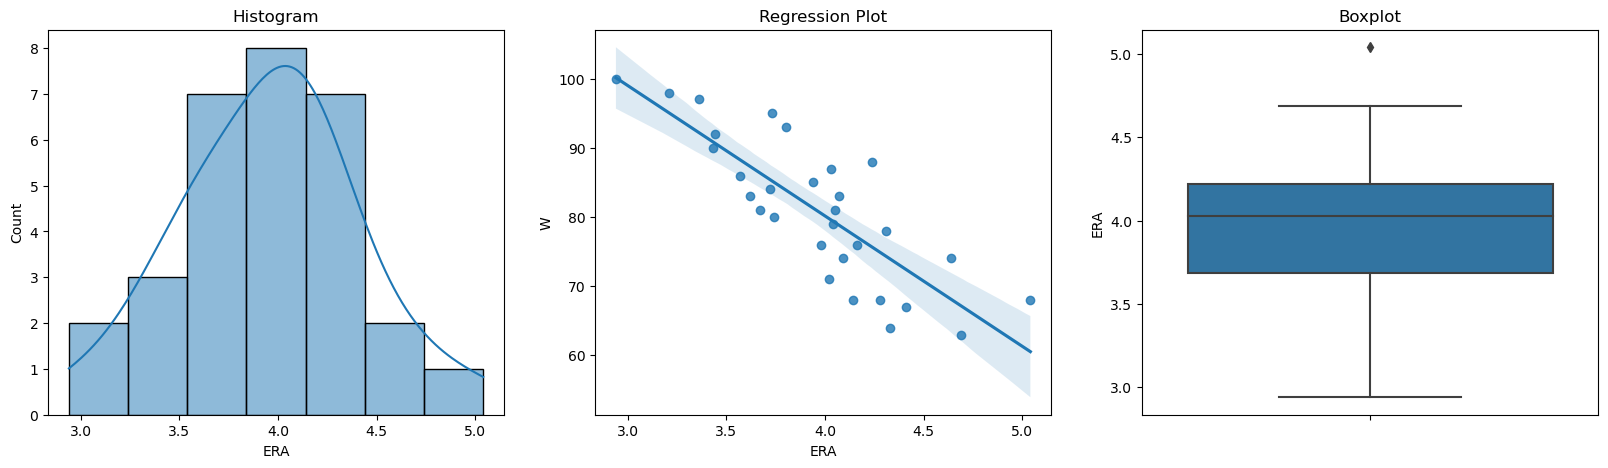

In [18]:
#call the function for 'ERA' - This means Earned Run Average
pplot(df,'ERA')

* Earned Run Average (ERA) is not correlated to win with no outliers and data is right-skewed.

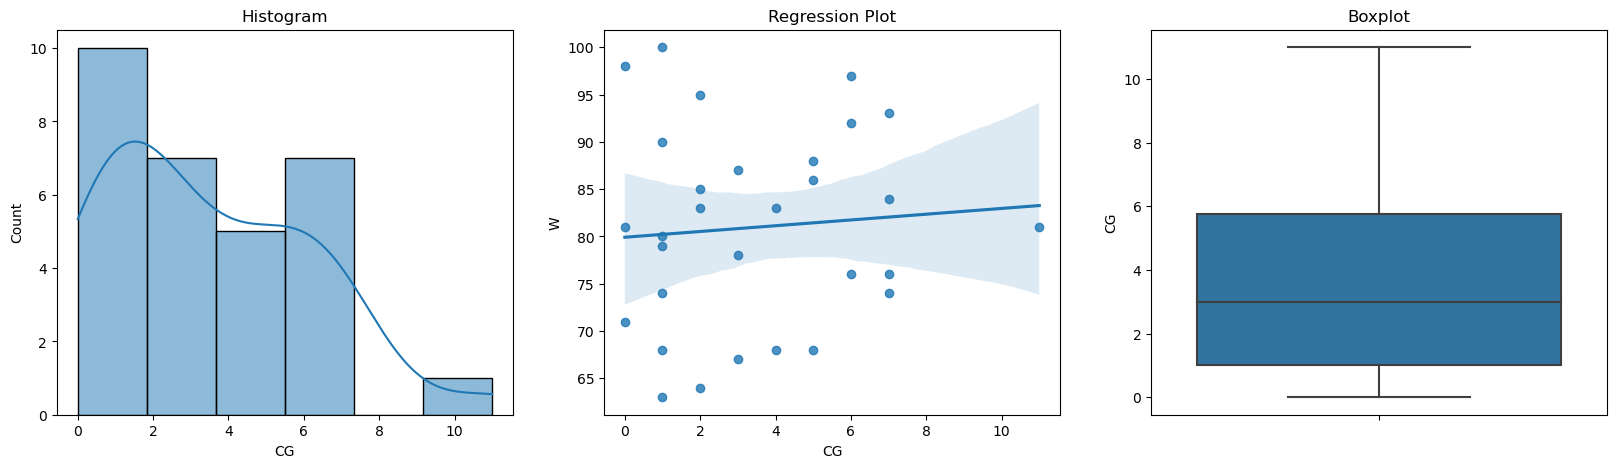

In [19]:
#call the function for 'CG' - This means Complete Game
pplot(df,'CG')

* Complete Game is not correlated to win with no outlier

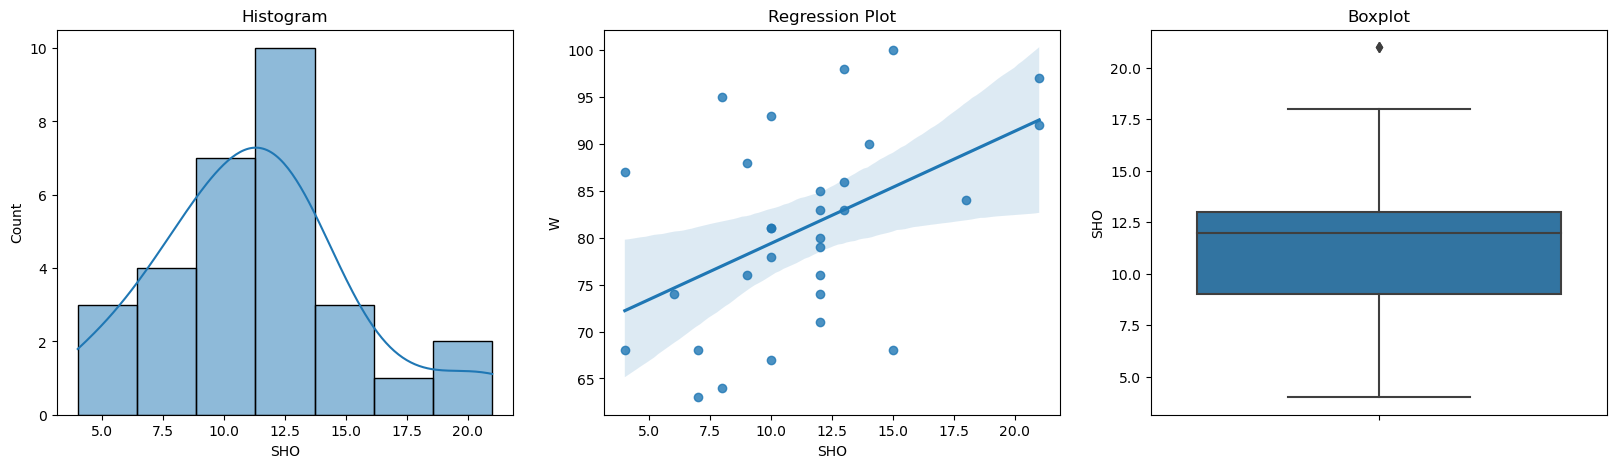

In [20]:
#call the function for 'SHO' - This means Shutout
pplot(df,'SHO')

* Shutouts are highly correlated to win with no outliers and data is right-skewed.

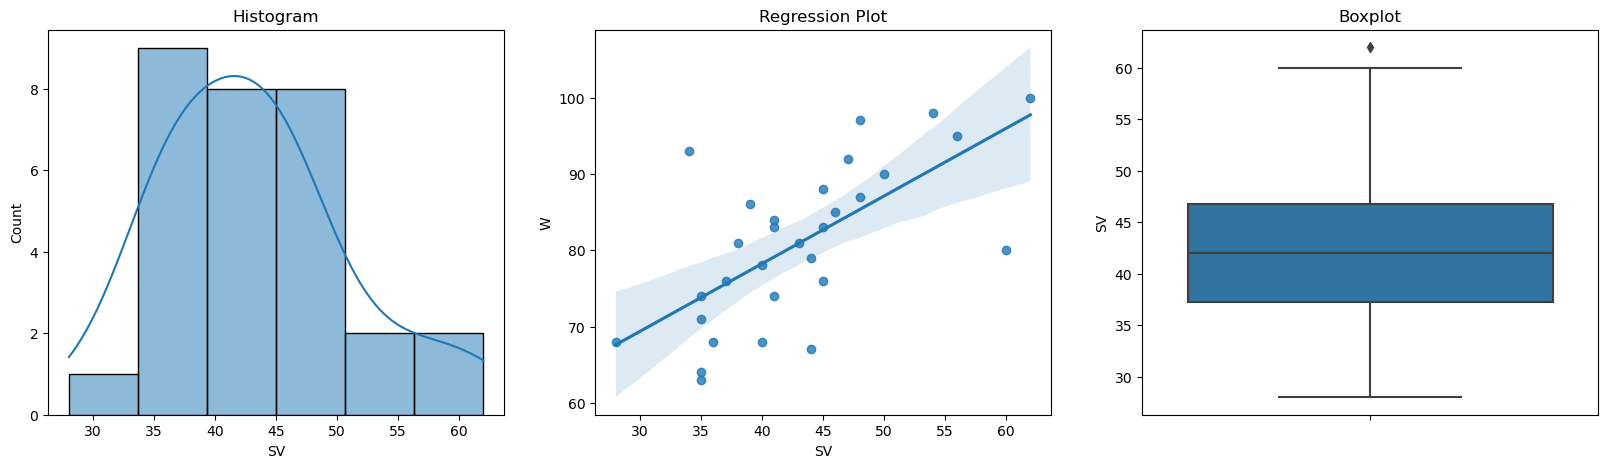

In [21]:
#call the function for 'SV' - This means Save
pplot(df,'SV')

* Saves are lightly correlated to win with no outliers-skewed.

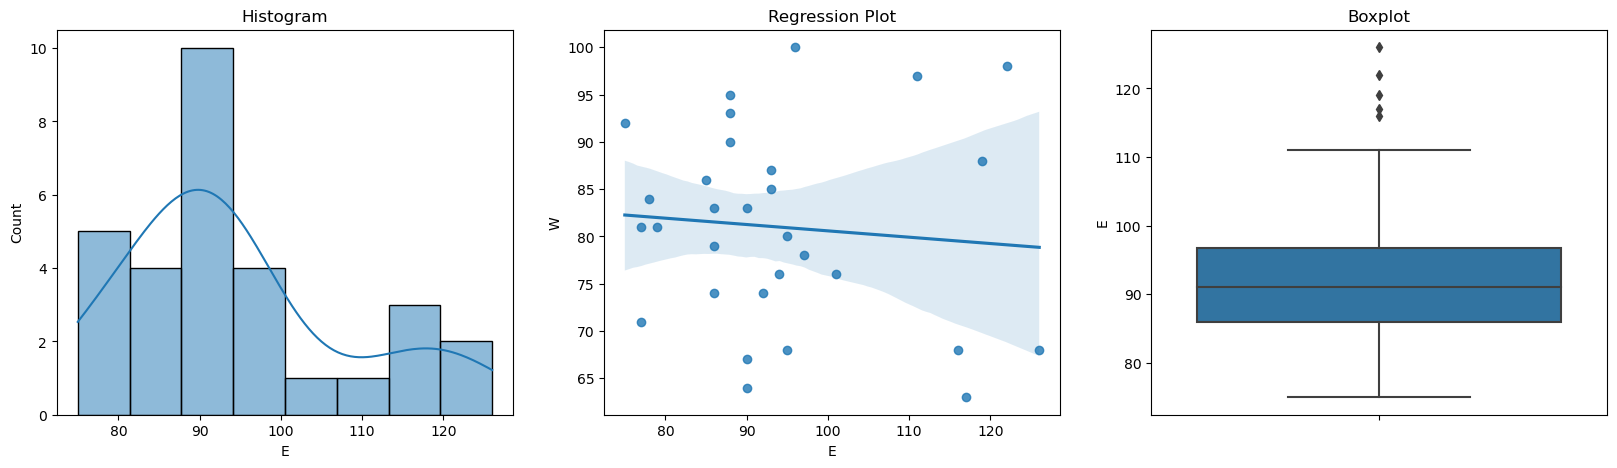

In [22]:
#call the function for 'E' - This means Errors
pplot(df,'E')

* Errors are not correlated to win, the data has outliers and data is right-skewed.

### Output Till Now:

* The number of runs, home runs, doubles, Saves, Shutouts, and Walks are highly positively linearly correlated.

* Stolen Bases, Runs Allowed, Earned Runs are highly negative linearly correlated.

* The remaining features have less to no linear correlation with no of Wins

* The dataset set has too much randomness. And only has sets of data (too little to form a suitable Decision tree)

**Pre-Processing Pipeline.**

As all the data in the set have continuous value the preprocessing steps consist of data transformation (standardization) and scaling (normalization).

* Standardization is a method to convert the data set into a normal distribution. There are many methods to do it.

1. Log-transformation — if the data set is highly rightly skewed then it is best to use Log-transformation
2. Square root transformation — if data is a little bit right-skewed then it is best to use square root transform
3. Cube root transformation
4. Reciprocal transformation
5. Box-cox transformation
6. Power transformation

And much more mathematical transformation is there to standardize the data.

* Normalization is a mathematical technic that scales the data into some range it is required for some machine learning algorithms such as Linear regression, KNN, etc.

Normalization minimizes the difference between the low valve and high value which helps in better prediction. Some Normalization methods are mentioned below 
1. Min-Max-Scaler- it converter the dataset into the range of 0 to 1
2. Mean Normalization- it converts the data set into the range of -1 ti 1 and the mean is 0.
3. Standard scaling(z-score)- its converts data set as mean=0, standard deviation as 1.


#### Finding the Outliers

* Outliers It can be defined as the odd one out means the data in the dataset having some odd values. It can be too low or too high. There are two main methods to remove outliers:

1. **Z-score method-** it covert the dataset into z-sore and then check if absolute of z_score is greater than 3 then remove those data. In a standard normal distribution, 99.73% of data should lie within 3 standard deviations i.e 3(the standard, deviation is 1).

In [23]:
# Compute the absolute z-scores for numerical columns
z = np.abs(stats.zscore(df.select_dtypes(include=np.number)))

# Get the total number of elements in the DataFrame
a = df.size

# Keep only the rows where the absolute z-scores are less than or equal to 3 for all numerical columns
df = df[(z <= 3).all(axis=1)]
df.head()
df.shape

(29, 17)

2. **IQR method-** IQR stands for the interquartile reason it uses percentile for outlier detection 50 percentile represents the median, 25 percentile represents the Q1, 75 percentile represents Q2.

In [24]:
Q1 = np.percentile(df['W'], 25, interpolation='midpoint')
Q3 = np.percentile(df['W'], 75, interpolation='midpoint')
IQR = Q3 - Q1
print("Old Shape: ", df.shape)

# Upper bound
upper = np.where(df['W'] >= (Q3 + 1.5 * IQR))

# Lower bound
lower = np.where(df['W'] <= (Q1 - 1.5 * IQR))

# Removing the Outliers
df.drop(upper[0], inplace=True)
df.drop(lower[0], inplace=True)

print("New Shape ",df.shape)

Old Shape:  (29, 17)
New Shape  (29, 17)


**Data Reduction** — This dataset has continuous independent value and dependent value. There are many technics for Data reduction

1. Pearson r correlation: Pearson r correlation is the most widely used correlation statistic to measure the degree of the relationship between linearly related variables.

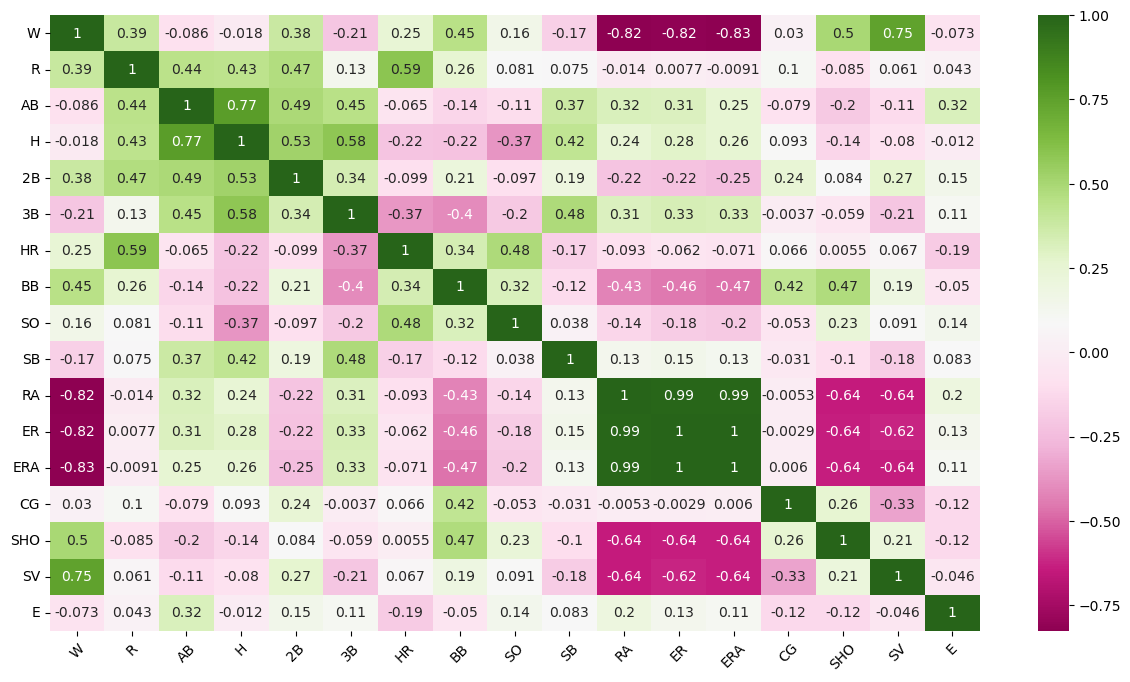

In [25]:
correlation_matrix = df.corr()

# Set the size of the heatmap
plt.figure(figsize=(15, 8))

# Plotting the heatmap with larger font size for annotations
sns.heatmap(correlation_matrix, annot=True, cmap='PiYG', annot_kws={"size": 10})

# Rotate the tick labels for better readability
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Show the plot
plt.show()

**2. ANOVA:** Analysis of variance (ANOVA) is an analysis tool used in statistics that splits an observed aggregate variability found inside a data set into two parts: systematic factors and random factors. The systematic factors have a statistical influence on the given data set, while the random factors do not. Analysts use the ANOVA test to determine the influence that independent variables have on the dependent variable in a regression study.

In [26]:
# Assuming 'df' is the DataFrame containing your features
# and 'target_column' is the name of the target column
target_column = 'E'

# Ensure 'df' and 'y' have consistent dimensions
df = df.iloc[:29]  # Keep the first 29 rows of the DataFrame
y = df[target_column].iloc[:29]  # Keep the first 29 elements of the target variable

# Drop the target column from the features DataFrame
X = df.drop(columns=[target_column])

# Perform feature selection
s = SelectKBest(f_classif, k=15)
s.fit(X, y)
anova = pd.DataFrame([s.scores_, s.pvalues_], columns=X.columns).T.sort_values(by=0)


3. **R-squared (R2):** It is a statistical measure that represents the proportion of the variance for a dependent variable that is explained by an independent variable. R-squared explains to what extent the variance of the dependent variable explains the variance of the dependent variable. So, if the R2 of a model is 0.50, then approximately half of the observed variation can be explained by the model’s inputs.

BB is having R2 score of 0.21520471368387262
SHO is having R2 score of 0.33067320137759776
RA is having R2 score of 0.5338009623477027
AB is having R2 score of 0.5981193826833179
E is having R2 score of 0.6685784173454398
H is having R2 score of 0.6969113184631479
3B is having R2 score of 0.7079865867883951
SO is having R2 score of 0.725351477017311


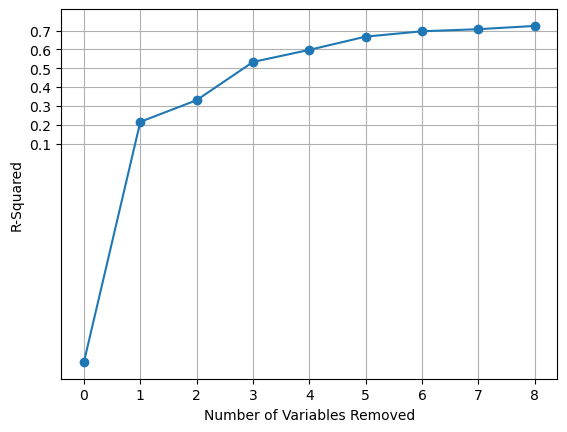

In [27]:
y = df['W']
X = df.drop(columns=['W'])

# Initial cross-validation with all features
cv_results = cross_validate(LinearRegression(normalize=True), X, y, cv=3, scoring='r2')
lr_reg = cv_results['test_score'].mean()

# List to store R2 scores
r2 = []
r2.append(lr_reg)

# Variables for loop control and tracking
j = 1
k = 0
least_r2 = -10

# Feature elimination loop
while j == 1 and k < len(X.columns):
    least_r2 = -10  # Reset least_r2 for each iteration
    least = None     # Reset least for each iteration
    for i in X.columns:
        demo_X = X.drop(i, axis=1)
        cv_results = cross_validate(LinearRegression(normalize=True), demo_X, y, cv=3, scoring='r2')
        lr_reg1 = cv_results['test_score'].mean()
        if lr_reg1 > lr_reg:
            least = i
            least_r2 = lr_reg1
            lr_reg = lr_reg1
    if least is not None:
        print(f"{least} is having R2 score of {least_r2}")
        X.drop(least, axis=1, inplace=True)
        r2.append(lr_reg)
        k += 1
    else:
        j = 0

# Plotting R2 scores
plt.plot(range(k + 1), r2, marker='o')
plt.xlabel('Number of Variables Removed')
plt.ylabel('R-Squared')
plt.xticks(range(k + 1))
plt.yticks(np.arange(0.1, 0.8, 0.1))
plt.grid(True)
plt.show()

* Pre-Processing pipeline is a step-by-step process of pre-processing required for a dataset for making it more understandable and recognizable by the computer to perform machine learning.
* preprocessing helps in reducing the noise or randomness from data. It consists of the following elements
1. **Data Cleaning:-** removing the Null value
2. **Data Integration:-** integrates data from a multitude of sources into a single data warehouse.
3. **Data Transformation:-** Transforming data such as standardization, normalization, encoding, etc
4. **Data Reduction:-** removing redundant data.

In [28]:
def pipeline_viz(df):
    num, cat = num_cat(df)
    num_plot(df, num)
    df[num] = pow_tran(df, num)
    df[num] = stan_sc(df, num)
    df[num] = z_outlier(df, num)
    df_new = dimention_reduction(df, num)
    return df_new


In [29]:
def num_cat(df):
    num = []
    cat = []
    count = df.nunique()
    for i in df.columns:
        if count[i] > 5:
            num.append(i)
        else:
            cat.append(i)
    return num, cat

def pow_tran(df, num):
    pt = pd.DataFrame()
    for i in num:
        if df[i].min() <= 0:
            pt1 = (df[i] - df[i].min() + 0.0001)
        else:
            pt1 = df[i]
        pt = pd.concat([pt, pd.DataFrame(pt1)], axis=1)
    pt1 = power_transform(pt)
    pt1 = pd.DataFrame(pt1, columns=num)
    return pt1

def num_plot(df, num):
    for i in num:
        plt.figure(figsize=(20,5))
        plt.subplot(1,3,1)
        sns.histplot(x=i, data=df, kde=True, hue='Churn')
        plt.subplot(1,3,2)
        sns.regplot(x=i, y='W', data=df, kde=True, hue='Churn')
        plt.subplot(1,3,3)
        sns.boxplot(y=i, data=df)
        plt.show()

def z_outlier(df, num):
    df_z = df[num]
    z = np.abs(stats.zscore(df_z))
    a = int(df_z.size)
    df_z = df_z[(z > 3).all(axis=1)]
    print('Percent of data retained = ' + str(int(df_z.size) / a))
    return df_z

def stan_sc(df, num):
    ss = StandardScaler()
    x = df[num].to_numpy()
    x1 = pd.DataFrame(ss.fit_transform(x), columns=num)
    return x1


**----------------------------------------------------------------------**

#### Building Machine Learning Models.

* Machine learning is as good as preprocessing. Now let’s take a look into some algorithms of machine learning for classification.

In [30]:
x = df.drop(columns=['W'])  # Features
y = df['W']  # Target

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Convert the continuous target variable into categorical labels (bins)
y_train_class = pd.cut(y_train, bins=3, labels=['Low', 'Medium', 'High'])
y_test_class = pd.cut(y_test, bins=3, labels=['Low', 'Medium', 'High'])

# Convert the categorical labels into numeric values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_class)
y_test_encoded = label_encoder.transform(y_test_class)

# Scale the features
scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

def clf(model, x, y, x_test, y_test):
    # Fit the model
    lr = model.fit(x, y)
    
    # Predict on test data
    y_pred = lr.predict(x_test)
    
    # Print evaluation metrics
    print(confusion_matrix(y_test, y_pred))
    print(accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    # Calculate F1 score
    lr_acc = f1_score(y_test, y_pred, average='weighted')
    
    # Calculate cross-validated score
    cv_results = cross_validate(model, x, y, cv=min(10, len(set(y))), scoring='f1_weighted')
    lr_score = cv_results['test_score'].mean()
    
    return lr_acc, lr_score

# Use classification evaluation metrics and models

lr_acc, lr_score = clf(LogisticRegression(), x_train_scaler, y_train_encoded, x_test_scaler, y_test_encoded)
rfc_acc, rfc_score = clf(RandomForestClassifier(), x_train_scaler, y_train_encoded, x_test_scaler, y_test_encoded)
xgc_acc, xgc_score = clf(XGBClassifier(), x_train_scaler, y_train_encoded, x_test_scaler, y_test_encoded)
etc_acc, etc_score = clf(ExtraTreesClassifier(), x_train_scaler, y_train_encoded, x_test_scaler, y_test_encoded)
svc_acc, svc_score = clf(SVC(), x_train_scaler, y_train_encoded, x_test_scaler, y_test_encoded)

# Calculate difference between score and accuracy
diff = [lr_score - lr_acc, rfc_score - rfc_acc, xgc_score - xgc_acc, etc_score - etc_acc, svc_score - svc_acc]

# Create DataFrame
result_df = pd.DataFrame({'Model': ['LR', 'RFC', 'XGC', 'ETC', 'SVC'],
                          'Score': [lr_score, rfc_score, xgc_score, etc_score, svc_score],
                          'Accuracy': [lr_acc, rfc_acc, xgc_acc, etc_acc, svc_acc],
                          'Difference': diff})

result_df.head()


[[0 0 2]
 [0 1 2]
 [0 0 1]]
0.3333333333333333
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      0.33      0.50         3
           2       0.20      1.00      0.33         1

    accuracy                           0.33         6
   macro avg       0.40      0.44      0.28         6
weighted avg       0.53      0.33      0.31         6

[[1 1 0]
 [0 2 1]
 [0 1 0]]
0.5
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      0.67      0.57         3
           2       0.00      0.00      0.00         1

    accuracy                           0.50         6
   macro avg       0.50      0.39      0.41         6
weighted avg       0.58      0.50      0.51         6

[[1 0 1]
 [0 1 2]
 [0 0 1]]
0.5
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1      

,Model,Score,Accuracy,Difference
0,LR,0.542744,0.305556,0.237188
1,RFC,0.547846,0.507937,0.039909
2,XGC,0.555556,0.538889,0.016667
3,ETC,0.718651,0.388889,0.329762
4,SVC,0.486508,0.047619,0.438889


**Now after selecting the best algorithm now we should do Hyperparameter tuning for extreme gradient boosting.**

* Random search cv:- It randomly Search the grid for the best scoring. Processing time is less but the accuracy is not that great
* Grid search cv:- it searches the grid one by one for the best scoring. Processing time is more but the accuracy is great

In [31]:
ridge_params = {'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=3)
ridge_grid.fit(x_train_scaler, y_train)
print('Best score:', ridge_grid.best_score_)
print('Best parameters:', ridge_grid.best_params_)
print('Best estimator:', ridge_grid.best_estimator_)


Best score: 0.7811572075895711
Best parameters: {'alpha': 10}
Best estimator: Ridge(alpha=10)


In [32]:

# Train a linear regression model on the final set of features
final_lr_model = LinearRegression(normalize=True)
final_lr_model.fit(X, y)

# Make predictions on the test data
y_pred = final_lr_model.predict(X)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Calculate R2 score
r2 = r2_score(y, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) score:", r2)


Root Mean Squared Error (RMSE): 2.609979685769053
R-squared (R2) score: 0.9345688825384106


**Concluding Remarks**
* As discussed in EDA and the dataset should be reduced by reducing the number of variables. Which was done by R-square dimension reduction.

* The root means square is 2.60 and the R-square value is 93.45.